This file contains example code to demonstrate various Pandas features.

In [1]:
from __future__ import print_function, division

%matplotlib inline

For the first example, I'll work with data from the BRFSS

In [2]:
import brfss
df = brfss.ReadBrfss(nrows=5000)
df['height'] = df.htm3

Of the first 5000 respondents, 42 have invalid heights.  Note that most obvious ways of checking for null don't work.

In [3]:
sum(df.height.isnull())

42

Use dropna to select valid heights.

In [4]:
valid_heights = df.height.dropna()
len(valid_heights)

4958

EstimatedPdf is an interface to gaussian_kde

In [5]:
import thinkstats2
pdf = thinkstats2.EstimatedPdf(valid_heights)

The kde object provides resample:

In [6]:
fillable = pdf.kde.resample(len(df)).flatten()
fillable.shape

(5000,)

Or you can use thinkstats objects instead.  First convert from EstimatedPdf to Pmf

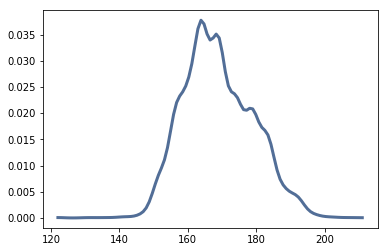

In [7]:
import thinkplot
pmf = pdf.MakePmf()
thinkplot.Pdf(pmf)

You can use the Pmf to generate a random sample, but it is faster to convert to Cdf:

In [8]:
cdf = pmf.MakeCdf()
fillable = cdf.Sample(len(df))

Then we can use fillna to replace NaNs

In [9]:
import pandas
series = pandas.Series(fillable)
df.height.fillna(series, inplace=True)
sum(df.height.isnull())

0

{'xscale': 'linear', 'yscale': 'linear'}

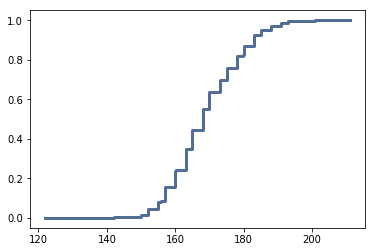

In [10]:
cdf = thinkstats2.Cdf(df.height)
thinkplot.Cdf(cdf)

In [14]:
import brfss
resp = brfss.ReadBrfss(nrows=5000).dropna(subset=['sex', 'htm3'])
grouped = resp.groupby('sex')

In [30]:
for i, group in grouped:
    print(i, group.shape)

1 (1611, 6)
2 (3347, 6)


In [26]:
grouped.get_group(1).mean()

age         54.868077
sex          1.000000
wtyrago     92.561772
finalwt    782.980373
wtkg2       91.694793
htm3       179.120422
dtype: float64

In [23]:
grouped.mean()

,age,wtyrago,finalwt,wtkg2,htm3
sex,,,,,
1,54.868077,92.561772,782.980373,91.694793,179.120422
2,54.891468,76.803614,418.628225,76.282271,163.973110


In [21]:
grouped['htm3'].mean()

sex
1      179.120422
2      163.973110
Name: htm3, dtype: float64

In [27]:
grouped.htm3.std()

sex
1      7.643153
2      7.013427
Name: htm3, dtype: float64

In [18]:
import numpy
grouped.aggregate(numpy.mean)

,age,wtyrago,finalwt,wtkg2,htm3
sex,,,,,
1,54.868077,92.561772,782.980373,91.694793,179.120422
2,54.891468,76.803614,418.628225,76.282271,163.973110


In [19]:
grouped.aggregate(numpy.std)

,age,wtyrago,finalwt,wtkg2,htm3
sex,,,,,
1,15.979595,20.082096,891.896249,19.124774,7.643153
2,16.318462,20.818984,480.059627,19.615797,7.013427


In [13]:
d = {}
for name, group in grouped:
    d[name] = group.htm3.values

In [13]:
d

{1: array([ 170.,  185.,  183., ...,  178.,  175.,  170.]),
 2: array([ 157.,  163.,  165., ...,  168.,  157.,  173.])}

In [1]:
import brfss
resp = brfss.ReadBrfss().dropna(subset=['sex', 'wtkg2'])

In [4]:
groups = resp.groupby('sex')
d = {}
for name, group in groups:
    d[name] = group.wtkg2

In [5]:
d

{1: 3      73.64
 4      88.64
 5     109.09
 8      90.00
 9      77.27
 10     63.64
 13    127.27
 20     76.36
 23     78.18
 26     77.27
 35     81.82
 39     90.00
 42     90.91
 45     93.18
 50     81.82
 ...
 414468     63.64
 414470     81.82
 414474     87.73
 414475    113.64
 414477    100.91
 414480     89.09
 414481     76.36
 414488    102.27
 414490     71.82
 414498     75.00
 414501     86.36
 414503     78.18
 414504     88.64
 414506     90.91
 414508     75.00
 Name: wtkg2, Length: 153900, dtype: float64, 2: 0      70.91
 1      72.73
 6      50.00
 7     122.73
 11     78.18
 12     62.73
 14     95.45
 15     88.64
 16     90.91
 17     50.00
 18    100.00
 19     72.73
 21     63.64
 22     55.45
 24     90.91
 ...
 414483     68.18
 414484     87.27
 414485     77.27
 414486     61.36
 414489     86.36
 414492     70.45
 414493     56.82
 414494     68.18
 414495     72.73
 414496     56.82
 414497     65.91
 414499    129.55
 414500     75.00
 414505     72.

In [9]:
import numpy

for sex, weights in d.items():
    print(sex, numpy.log(weights).mean(), numpy.log(weights).std())

(1, 4.4693001977146656, 0.19557721757853172)
(2, 4.2596856357921178, 0.22599757494674719)


In [10]:
import scipy.stats

In [28]:
shape, loc, scale = scipy.stats.lognorm.fit(d[1], floc=0)
shape, loc, scale

(0.19557677265342968, 0, 87.295636995626353)

In [27]:
shape, loc, scale = scipy.stats.lognorm.fit(d[2], floc=0)
shape, loc, scale

(0.22599714638037718, 0, 70.787767991419116)

In [12]:
import thinkstats2
cdf = thinkstats2.Cdf(d[2])

{'xscale': 'linear', 'yscale': 'linear'}

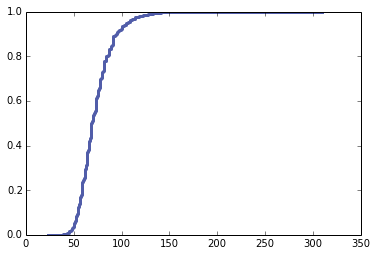

In [14]:
import thinkplot
%matplotlib inline

thinkplot.Cdf(cdf)

In [25]:
rv = scipy.stats.lognorm(0.23, 0, 70.8)

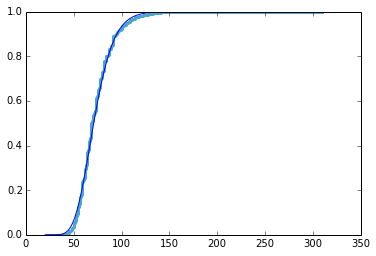

In [26]:
import matplotlib.pyplot as pyplot
xs = numpy.linspace(20, 200, 100)
ys = rv.cdf(xs)
thinkplot.Cdf(cdf)
pyplot.plot(xs, ys)